In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import scipy as sc
import math
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [6]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/Its_A_Fraud/Train_withoutNUllValues.csv')

In [7]:
df.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,...,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1,3206179,0,5150800,57.95,W,4527,376.0,150.0,visa,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,3410455,0,10713596,115.95,W,2772,512.0,150.0,visa,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,107.949997,107.949997,107.949997
3,3,3058578,0,1611950,100.00,H,14290,512.0,150.0,visa,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,3242131,0,6111087,95.00,W,12839,321.0,150.0,visa,...,64.949997,23.950001,120.900002,72.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [8]:
c_features=df.select_dtypes(include=np.object).columns
n_features=df.select_dtypes(include=np.number).columns
print(len(c_features))
print(len(n_features))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


9
212


In [9]:
c_features

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M6'],
      dtype='object')

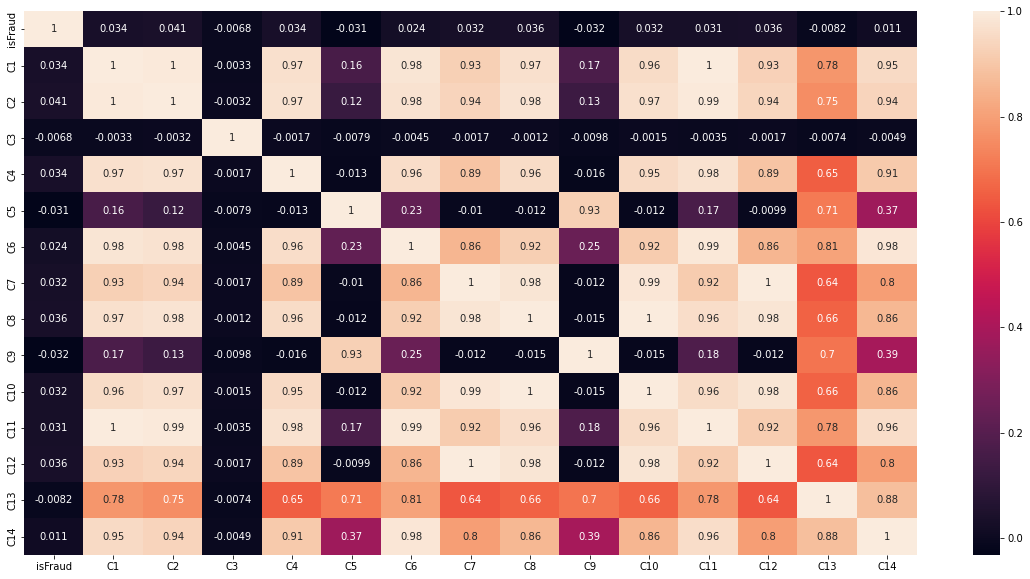

In [10]:
df_C = df.loc[:,['isFraud','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
cor_C  = df_C.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_C.corr(), 
        xticklabels=df_C.columns,
        yticklabels=df_C.columns,annot=True)

In [11]:
df = df.drop(columns= ['C2','C4','C6','C7','C8','C9','C10','C11','C12','C14'])

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

lst = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4','M6']
for col in lst: 
  df[col] = labelencoder.fit_transform(df[col])
df.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,3424175,0,11053717,49.00,4,5033,269.0,150.0,2,...,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1,3206179,0,5150800,57.95,4,4527,376.0,150.0,3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,3410455,0,10713596,115.95,4,2772,512.0,150.0,3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,107.949997,107.949997,107.949997
3,3,3058578,0,1611950,100.00,1,14290,512.0,150.0,3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,3242131,0,6111087,95.00,4,12839,321.0,150.0,3,...,64.949997,23.950001,120.900002,72.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [13]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [14]:
df.isFraud.value_counts()

0    427408
1     15497
Name: isFraud, dtype: int64

In [15]:
no_fraud = df[df.isFraud == 0]
yes_fraud = df[df.isFraud == 1]

In [16]:
no_fraud_sample = no_fraud.sample(n = 15497)

In [17]:
newdf = pd.concat([no_fraud_sample, yes_fraud], axis=0)

In [18]:
y_train=newdf['isFraud']
x_train = newdf.drop(columns = 'isFraud', axis = 1)


In [19]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(df[df.columns[df.columns!="isFraud"]],df.isFraud,random_state=45,test_size=.2)

In [20]:
y_train.value_counts()

0    15497
1    15497
Name: isFraud, dtype: int64

In [21]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 101)
# X_train, Y_train = smote.fit_resample(x_train, y_train)

In [22]:
df2 = pd.DataFrame(x_train, columns = newdf.drop(columns=['isFraud']).columns)
df2['isFraud'] = y_train

In [23]:
df2.isFraud.value_counts()

0    15497
1    15497
Name: isFraud, dtype: int64

In [24]:
xtrain_col = x_train.columns

In [25]:
xtrain_col

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=209)

Testing

In [26]:
dftest=pd.read_csv('drive/MyDrive/Colab Notebooks/Its_A_Fraud/test.csv')

In [27]:
dftest = dftest[xtrain_col]

In [28]:
dftest

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3460689,12245831,325.000,W,12932,361.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,325.0,325.0,325.0,0.0,0.0,0.0
1,3415050,10807203,37.257,C,14276,177.0,185.0,mastercard,137.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3408682,10685267,100.000,R,16506,554.0,150.0,visa,226.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3389297,10160809,57.950,W,9500,321.0,150.0,visa,226.0,debit,...,0.0,35.950001,35.950001,35.950001,0.0,0.0,0.0,0.0,0.0,0.0
4,3366334,9492365,34.258,C,15885,545.0,185.0,visa,138.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147630,3193088,4738133,3340.640,W,7676,512.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
147631,3400907,10444920,171.000,W,2772,512.0,150.0,visa,226.0,debit,...,0.0,507.000000,507.000000,507.000000,0.0,0.0,0.0,0.0,0.0,0.0
147632,3489602,13181877,404.950,W,7919,194.0,150.0,mastercard,166.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
147633,3534022,14431969,35.950,W,11839,490.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
dftest.isna().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
                 ..
V317              7
V318              7
V319              7
V320              7
V321              7
Length: 209, dtype: int64

In [30]:
dftest.fillna(dftest.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [31]:
dftest.isna().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 209, dtype: int64

In [32]:
labelencoder = LabelEncoder()

lst = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4','M6']
for col in lst: 
  dftest[col] = labelencoder.fit_transform(dftest[col])
dftest.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3460689,12245831,325.000,4,12932,361.0,150.0,3,226.0,2,...,0.0,0.000000,0.000000,0.000000,325.0,325.0,325.0,0.0,0.0,0.0
1,3415050,10807203,37.257,0,14276,177.0,185.0,2,137.0,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3408682,10685267,100.000,2,16506,554.0,150.0,3,226.0,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3389297,10160809,57.950,4,9500,321.0,150.0,3,226.0,2,...,0.0,35.950001,35.950001,35.950001,0.0,0.0,0.0,0.0,0.0,0.0
4,3366334,9492365,34.258,0,15885,545.0,185.0,3,138.0,2,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Implementing the Model

RandomSearchCV on SVM

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
svc_param_grid = {'C': [1,2,3,4,8,15],
                  'degree' : [3,4,5],
                  'tol': [1e-3, 1e-4, 1e-5]
                 }
# logReg = LogisticRegression()
# logReg_grid = GridSearchCV(logReg, logReg_param_grid, cv=6, verbose=10, scoring='roc_auc', n_jobs=-1)
# logReg_grid.fit(x_train,y_train)

svclass = SVC()
svc_grid =  RandomizedSearchCV(svclass, svc_param_grid)
svc_grid.fit(x_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


RandomizedSearchCV(cv=6, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 8, 15],
                                        'degree': [3, 4, 5],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   scoring='roc_auc', verbose=10)

In [34]:
svm_best = svc_grid.best_params_.items()
for hps, values in svm_best:
  print(f"{hps}: {values}")

tol: 1e-05
degree: 5
C: 15


In [36]:
# logReg_bestParams = logReg_grid.best_params_.items()
# for hps, values in logReg_bestParams:
#   print(f"{hps}: {values}")

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# gb=MultinomialNB()
# gb.fit(X_train,Y_train)
# y_test=gb.predict(dftest)

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# xgb = XGBClassifier(seed=45)
# param_grid_xgb = {'max_depth':[18,10,15], 'subsample':[0.4,0.6,0.8], 'learning_rate': [0.02,0.2,0.05],'n_estimators': [500, 1000,2000],'gamma':[0.5,0.8,0.2]}
# xgb_grid_r = RandomizedSearchCV(xgb, param_grid_xgb, scoring='roc_auc',cv = 5,verbose=1,n_jobs=-1)
# xgb_grid_r.fit(x_train,y_train)
# y_test = xgb_grid_r.predict(dftest)

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train,y_train)
# y_test = xgb.predict(dftest)

In [38]:
y_test = svc_grid.predict(dftest)

In [39]:
len(y_test)

147635

In [40]:
id = []

In [41]:
type(id)

list

In [42]:
for i in range(147635):
  id.append(i)

In [43]:
df_pred = pd.DataFrame(id, columns = ['id'])


In [44]:
df_pred['isFraud'] = y_test

In [45]:
df_pred

,id,isFraud
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
147630,147630,1
147631,147631,1
147632,147632,0
147633,147633,0


In [46]:
from google.colab import files
df_pred.to_csv('prediction.csv')
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>